<a href="https://colab.research.google.com/github/PatronesGrupo4/Grupo4/blob/main/Challenges/Challenge_3_Avance_Sergio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{C0708 | Reconocimiento de Patrones}$$




$$\large \textbf{Challenge 3 | Training y Testing, Overfitting, regularization, Support Vector Machines}$$

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

df_train = pd.read_csv('/content/drive/MyDrive/Patrones 2023.2/Semana 6/Challenge 3/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Patrones 2023.2/Semana 6/Challenge 3/test.csv')
df_train.set_index('id', inplace=True)
df_train.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


###Encoding

Codificamos el target para poder trabajar con él.

In [60]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

#make an instance of Label Encoder
categorias_target = []
for elemento in df_train['prognosis']:
    if elemento not in categorias_target:
        categorias_target.append(elemento)

encoder = OrdinalEncoder(categories=[categorias_target])
df_train['prognosis_ENCODED'] = encoder.fit_transform(df_train[['prognosis']])
df_train.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis,prognosis_ENCODED
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis,1.0
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease,0.0
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever,3.0


Extraemos los datos de entrenamiento y prueba

In [61]:
x = df_train.drop(df_train.columns[-2:], axis=1)
y = df_train["prognosis_ENCODED"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

#Support Vector Machine

Hallamos los mejores valores para los hiperparámetros gamma y C

In [62]:
from time import time

import matplotlib.pyplot as plt
from scipy.stats import loguniform

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 2.093s
Best estimator found by grid search:
SVC(C=4086.6936037413716, class_weight='balanced', gamma=0.0001015380436965684)


Procedemos a usar el modelo para predecir el target en el dataset de prueba y analizamos las métricas

Predicting the target on the test set
done in 0.012s
                       precision    recall  f1-score   support

         Lyme_disease       0.44      0.41      0.42        17
            Tungiasis       0.40      0.53      0.46        15
                 Zika       0.19      0.38      0.26        13
    Rift_Valley_fever       0.21      0.17      0.19        18
      West_Nile_fever       0.11      0.11      0.11        19
              Malaria       0.38      0.25      0.30        12
          Chikungunya       0.62      0.94      0.74        17
               Plague       0.11      0.07      0.08        15
               Dengue       0.21      0.23      0.22        13
         Yellow_Fever       0.20      0.23      0.21        13
Japanese_encephalitis       0.30      0.12      0.17        25

             accuracy                           0.31       177
            macro avg       0.29      0.31      0.29       177
         weighted avg       0.29      0.31      0.28       177


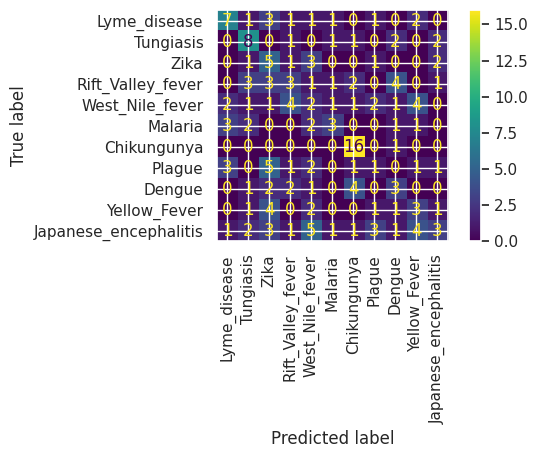

In [63]:
print("Predicting the target on the test set")
t0 = time()
y_pred = clf.predict(x_test)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=categorias_target))
ConfusionMatrixDisplay.from_estimator(
    clf, x_test, y_test, display_labels=categorias_target, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

El modelo tuvo precision muy baja por lo que procedemos a realizar principal component analysis y volver a intentar

In [104]:
print("Extracting the principal components")
t0 = time()
pca = PCA(svd_solver="randomized", whiten=True)

# Ajustar PCA al conjunto de entrenamiento para calcular el número de componentes necesarios
pca.fit(x_train)

# Determinar el número de componentes necesarios para conservar el 70% de la varianza
n_components = len(pca.explained_variance_ratio_) - (pca.explained_variance_ratio_.cumsum() >= 0.7).sum() + 1

# Ajustamos PCA con el número de componentes calculado
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True)

t0 = time()

# Ajustar PCA al conjunto de entrenamiento
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
print("done in %0.3fs" % (time() - t0))

Extracting the principal components
done in 0.015s


Volvemos a crear el modelo de SVM

Fitting the classifier to the training set
done in 4.752s
Best estimator found by grid search:
SVC(C=9933.44179991878, class_weight='balanced', gamma=0.0007350918596040543)
Predicting the target on the test set
done in 0.008s
                       precision    recall  f1-score   support

         Lyme_disease       0.64      0.41      0.50        17
            Tungiasis       0.42      0.67      0.51        15
                 Zika       0.20      0.23      0.21        13
    Rift_Valley_fever       0.22      0.28      0.24        18
      West_Nile_fever       0.19      0.26      0.22        19
              Malaria       0.50      0.33      0.40        12
          Chikungunya       0.63      0.71      0.67        17
               Plague       0.14      0.07      0.09        15
               Dengue       0.18      0.23      0.20        13
         Yellow_Fever       0.19      0.23      0.21        13
Japanese_encephalitis       0.27      0.12      0.17        25

             acc

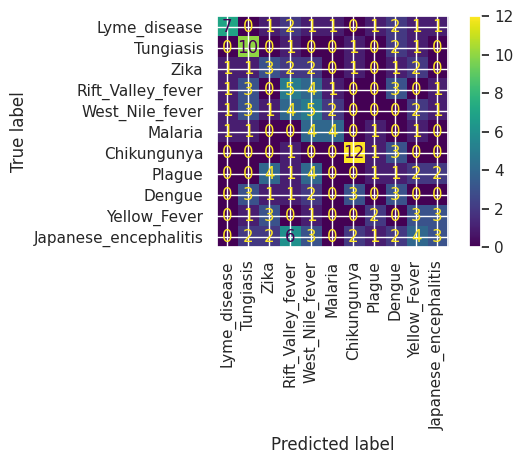

In [105]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(x_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Predicting the target on the test set")
t0 = time()
y_pred = clf.predict(x_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=categorias_target))
ConfusionMatrixDisplay.from_estimator(
    clf, x_test_pca, y_test, display_labels=categorias_target, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()